<a href="https://colab.research.google.com/github/nakisa84/Springboard/blob/main/capston%202%20project/notebooks/BC_Preproccesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Survival Prediction Pre Processing**

# 1. Introduction

In the previous sections we have cleaned and explore the data. Most of the features were categorical and were converted to dummy data. Also as the data was imbalanced  SMOTE method used to add some synthetic data and eventually very nice and balanced data was produced. Also by exploring the data we have a good undrestanding of the features that can be used in our model.

In this section we conclude the data processing and make the data ready for modeling.


In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2

def prepare_train_test (df,target):
    X = df.drop(target, axis = 1)
    y = df[[target]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    return X_train, X_test, y_train, y_test
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# data prepration
def prepare_train_test (df,target):
    X = df.drop(target, axis = 1)
    y = df[[target]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    return X_train, X_test, y_train, y_test

# feature selection
def calculate_scores(fs,features):
    features_score = []
    for i in range(len(fs.scores_)):
        features_score.append((features.columns.values[i],fs.scores_[i]))
    # plot the scores
    features_score.sort(key=lambda y: y[1], reverse = True)
    df_scores = pd.DataFrame(features_score, columns =['Name', 'Score'])
    print(df_scores)
    plt.bar([i for i in range(len(df_scores))],df_scores['Score'])
    plt.xticks(rotation=20)
    plt.show()  
    
# count plot the features
def countplot_features(df,ncol):
    count = 0
    for item in df.columns:
      if item != 'Status':
        index = count%ncol
        if index == 0:
          fig, ax = plt.subplots(1,ncol,figsize = (20,5))
        sns.countplot(x=item, hue='Status', data=df, ax=ax[index]);
        count +=1


# 2.Load the data

In [37]:
# loading data from colab environment
# from google.colab import drive
# drive.mount('/content/drive')
# fpath = '/content/drive/My Drive/Springboard/capston 2 project/data/bc_data_synthetic.csv'

# loading data from Jupyter environment
fpath = '../data/bc_data_synthetic.csv'

df = pd.read_csv(fpath)

In [38]:
print(df.shape)
df.head()

(6816, 27)


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,...,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Grade II,Grade_Grade III,Grade_anaplastic,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status
0,43,40,19,11,1,1,0,1,0,0,...,0,0,1,1,0,0,1,1,1,0
1,47,45,25,9,2,1,0,1,0,0,...,1,0,0,1,0,0,1,1,1,0
2,67,25,4,1,2,0,1,1,0,0,...,0,0,0,0,1,0,1,1,1,1
3,46,19,26,1,2,0,1,0,0,0,...,0,0,0,1,0,0,1,1,1,1
4,63,35,21,5,3,0,1,1,0,0,...,1,0,0,1,0,0,1,1,1,1


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6816.0,54.416373,8.991382,30.0,48.0,55.0,62.0,69.0
Tumor Size,6816.0,33.225499,22.436255,1.0,18.0,25.0,42.0,140.0
Regional Node Examined,6816.0,14.185593,7.760806,1.0,9.0,13.0,19.0,61.0
Reginol Node Positive,6816.0,5.114877,5.848930,1.0,1.0,3.0,7.0,46.0
Survival Months,6816.0,60.425910,26.614364,1.0,42.0,61.0,82.0,107.0
Race_Other,6816.0,0.048709,0.215275,0.0,0.0,0.0,0.0,1.0
Race_White,6816.0,0.789026,0.408030,0.0,1.0,1.0,1.0,1.0
Marital Status_Married,6816.0,0.522154,0.499546,0.0,0.0,1.0,1.0,1.0
Marital Status_Separated,6816.0,0.006602,0.080991,0.0,0.0,0.0,0.0,1.0
Marital Status_Single,6816.0,0.100939,0.301270,0.0,0.0,0.0,0.0,1.0


# 4. Feature Selection
There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.

They are:

Chi-Squared Statistic.
Mutual Information Statistic. 

We will use the Chi-Squared Statistic

In [40]:
# prepare and divide the data to test and train
X_train, X_test, y_train, y_test = prepare_train_test (df,'Status')

# fit the data to the feature selection model
X_train_fs, X_test_fs, fs = select_features(X_train, y_train,X_test)


                            Name         Score
0                Survival Months  17478.803015
1                     Tumor Size   1967.014049
2          Reginol Node Positive   1750.902463
3                 Grade_Grade II    212.033694
4         Marital Status_Married    182.786460
5   Progesterone Status_Positive    173.888837
6                  6th Stage_IIB    118.987770
7          Marital Status_Single    106.100394
8                     N Stage_N3    105.947388
9                 6th Stage_IIIC    105.947388
10                    Race_Other     98.157095
11      Estrogen Status_Positive     64.603892
12                           Age     40.265232
13        Marital Status_Widowed     37.917861
14                6th Stage_IIIA     31.855896
15                    Race_White     22.984368
16                    N Stage_N2     10.651684
17              A Stage_Regional      5.579573
18                    T Stage_T3      5.100155
19      Marital Status_Separated      4.193361
20        Reg

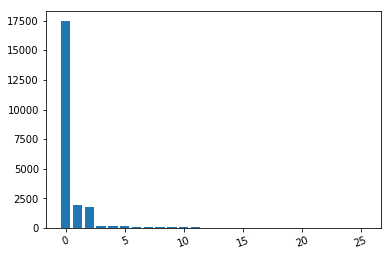

In [41]:
# what are scores for the features
calculate_scores(fs,X_train)

In [50]:
#Lets drop survival month and tumore size and positive node as they have very high impact on the target data and explore the rest features
df_drop = df.drop(['Survival Months','Tumor Size','Reginol Node Positive'], axis = 1)

In [51]:
# recaclculate the best features
# prepare and divide the data to test and train
X_train, X_test, y_train, y_test = prepare_train_test (df_drop,'Status')

# fit the data to the feature selection model
X_train_fs, X_test_fs, fs = select_features(X_train, y_train,X_test)

                            Name       Score
0                 Grade_Grade II  212.033694
1         Marital Status_Married  182.786460
2   Progesterone Status_Positive  173.888837
3                  6th Stage_IIB  118.987770
4          Marital Status_Single  106.100394
5                     N Stage_N3  105.947388
6                 6th Stage_IIIC  105.947388
7                     Race_Other   98.157095
8       Estrogen Status_Positive   64.603892
9                            Age   40.265232
10        Marital Status_Widowed   37.917861
11                6th Stage_IIIA   31.855896
12                    Race_White   22.984368
13                    N Stage_N2   10.651684
14              A Stage_Regional    5.579573
15                    T Stage_T3    5.100155
16      Marital Status_Separated    4.193361
17        Regional Node Examined    3.945062
18                6th Stage_IIIB    1.389694
19                    T Stage_T4    1.146433
20              Grade_anaplastic    0.243042
21        

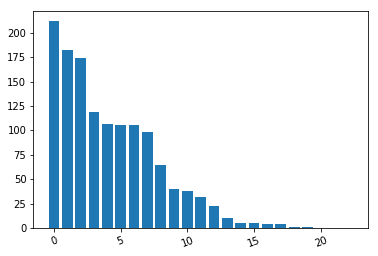

In [52]:
# what are scores for the features
calculate_scores(fs,X_train)

As seen above these features are the most important ones accroding to our KBest model:

    1- Grade_Grade II  
    2- Progesterone Status_Positive  
    3- N Stage_N3  
    4- 6th Stage_IIIC  
    5- Marital Status_Married  

As discoverd in data wrangling T stage,N satge and 6th stage had correlation with each other. Therefore we can just select either N Stage_N3, 6th Stage_IIIC and drop one. I will drop N Stage_N3.

In [53]:
#drop the N stage
df_drop = df_drop.drop(['N Stage_N3'], axis = 1)

In [54]:
# recaclculate the best features

# prepare and divide the data to test and train
X_train, X_test, y_train, y_test = prepare_train_test (df_drop,'Status')

# fit the data to the feature selection model
X_train_fs, X_test_fs, fs = select_features(X_train, y_train,X_test)


                            Name       Score
0                 Grade_Grade II  212.033694
1         Marital Status_Married  182.786460
2   Progesterone Status_Positive  173.888837
3                  6th Stage_IIB  118.987770
4          Marital Status_Single  106.100394
5                 6th Stage_IIIC  105.947388
6                     Race_Other   98.157095
7       Estrogen Status_Positive   64.603892
8                            Age   40.265232
9         Marital Status_Widowed   37.917861
10                6th Stage_IIIA   31.855896
11                    Race_White   22.984368
12                    N Stage_N2   10.651684
13              A Stage_Regional    5.579573
14                    T Stage_T3    5.100155
15      Marital Status_Separated    4.193361
16        Regional Node Examined    3.945062
17                6th Stage_IIIB    1.389694
18                    T Stage_T4    1.146433
19              Grade_anaplastic    0.243042
20                    T Stage_T2    0.155767
21        

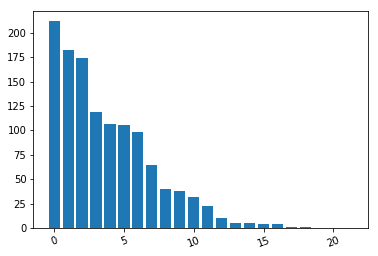

In [55]:
# what are scores for the features
calculate_scores(fs,X_train)

As seen above these features are the most important ones accroding to our new KBest model:
    
    1- Grade_Grade II 
    2- Progesterone Status_Positive
    3- 6th Stage_IIIC
    4- Marital Status_Married
    5- Marital Status_Single
    6- Race_Other
    7- Estrogen Status_Positive 
    8- Survival Months
    9- Tumor Size
    10- Reginol Node Positive

# 3. Split the data to test and train

In [57]:
#split the whole data to test and train
X_train, X_test, y_train, y_test = prepare_train_test(df,'Status')

print('X train shape is:{}'.format(X_train.shape))
print('y train shape is:{}'.format(y_train.shape))
print('X test shape is:{}'.format(X_test.shape))
print('y test shape is:{}'.format(y_test.shape))

X train shape is:(4566, 26)
y train shape is:(4566, 1)
X test shape is:(2250, 26)
y test shape is:(2250, 1)


# 4. Scale the data

In [58]:
scaler = MinMaxScaler(feature_range=(0, 5))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [59]:
#save the data
# fpath= '/content/drive/My Drive/Springboard/capston 2 project/data/'
fpath = '../data/'

X_train_fpath = fpath + 'train-test/bc_data_X_train.csv'
y_train_fpath = fpath + 'train-test/bc_data_y_train.csv'
X_test_fpath = fpath + 'train-test/bc_data_X_test.csv'
y_test_fpath = fpath + 'train-test/bc_data_y_test.csv'


X_train.to_csv(X_train_fpath, index=False)
y_train.to_csv(y_train_fpath, index=False)

X_test.to_csv(X_test_fpath, index=False)
y_test.to_csv(y_test_fpath, index=False)

Lets save the selected feature data as well, by splitting to test and train

In [62]:
#split selected data to test and train
df_feature_selection = df[['Survival Months','Tumor Size','Reginol Node Positive','Grade_Grade II','Progesterone Status_Positive','6th Stage_IIIC','Marital Status_Married','Estrogen Status_Positive','Status']]
X_train, X_test, y_train, y_test = prepare_train_test(df_feature_selection,'Status')

print('X train shape is:{}'.format(X_train.shape))
print('y train shape is:{}'.format(y_train.shape))
print('X test shape is:{}'.format(X_test.shape))
print('y test shape is:{}'.format(y_test.shape))

X train shape is:(4566, 8)
y train shape is:(4566, 1)
X test shape is:(2250, 8)
y test shape is:(2250, 1)


Now apply the scaling to the continious data.

In [63]:
scaler = MinMaxScaler(feature_range=(0, 5))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [64]:
#save the data
X_train_fpath = fpath + 'train-test/bc_data_X_train_selected.csv'
y_train_fpath = fpath + 'train-test/bc_data_y_train_selected.csv'
X_test_fpath = fpath + 'train-test/bc_data_X_test_selected.csv'
y_test_fpath =  fpath + 'train-test/bc_data_y_test_selected.csv'


X_train_scaled_df.to_csv(X_train_fpath, index=False)
y_train.to_csv(y_train_fpath, index=False)

X_test_scaled_df.to_csv(X_test_fpath, index=False)
y_test.to_csv(y_test_fpath, index=False)